In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes

In [3]:
A=np.loadtxt('COLVARA', skiprows=5)
B=np.loadtxt('COLVARB',skiprows=5)

In [4]:
time=np.zeros(101,dtype=float)

In [5]:
Aphi=np.zeros(101,dtype=float)
Apsi=np.zeros(101,dtype=float)
for i in range(101):
    time[i]=i*0.02
    Aphi[i]=A[i][1]
    Apsi[i]=A[i][2]

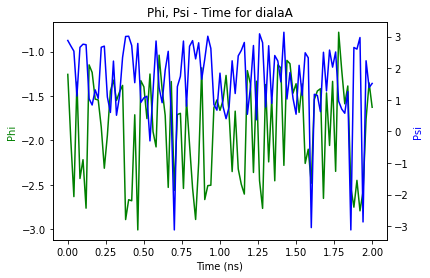

In [6]:
fig, ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.plot(time, Aphi, 'g')
ax2.plot(time,Apsi, 'b')
ax1.set_title('Phi, Psi - Time for dialaA')
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Phi', color='g')
ax2.set_ylabel('Psi', color='b')
plt.show()

In [7]:
Bphi=np.zeros(101,dtype=float)
Bpsi=np.zeros(101,dtype=float)
for i in range(101):
    time[i]=i*0.02
    Bphi[i]=B[i][1]
    Bpsi[i]=B[i][2]

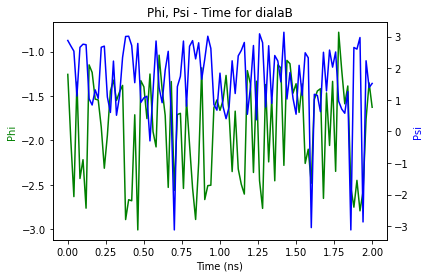

In [8]:
fig, ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.plot(time, Aphi, 'g')
ax2.plot(time,Apsi, 'b')
ax1.set_title('Phi, Psi - Time for dialaB')
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Phi', color='g')
ax2.set_ylabel('Psi', color='b')
plt.show()

In [9]:
trajA=md.load_xtc('trajA.xtc',top='dialaA.pdb')
trajB=md.load_xtc('trajB.xtc',top='dialaB.pdb')

In [10]:
phi_A=md.compute_phi(trajA,periodic=False)
psi_A=md.compute_psi(trajA,periodic=False)
phiA=np.zeros(101,dtype=float)
psiA=np.zeros(101,dtype=float)
for i in range(101):
    phiA[i]=phi_A[1][i*100]
    psiA[i]=psi_A[1][i*100]

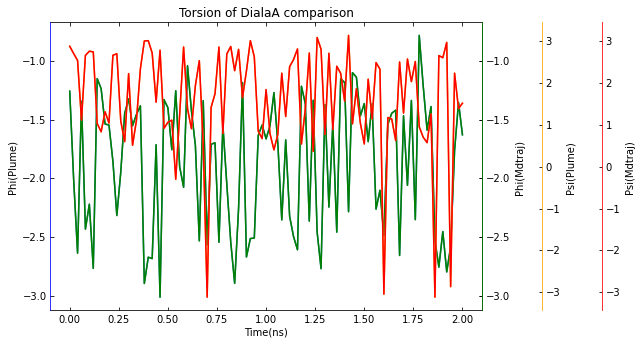

In [11]:
fig=plt.figure(1)
ax1=HostAxes(fig,[0,0,1,1])
ax2=ParasiteAxes(ax1,sharex=ax1)
ax3=ParasiteAxes(ax1,sharex=ax1)
ax4=ParasiteAxes(ax1,sharex=ax1)
ax1.parasites.append(ax2)
ax1.parasites.append(ax3)
ax1.parasites.append(ax4)
ax1.set_title('Torsion of DialaA comparison')
ax1.set_ylabel('Phi(Plume)')
ax1.set_xlabel("Time(ns)")
ax2.set_ylabel('Phi(Mdtraj)')
ax3.set_ylabel("Psi(Plume)")
ax4.set_ylabel("Psi(Mdtraj)")
ax2_axisline = ax2.get_grid_helper().new_fixed_axis
ax3_axisline = ax3.get_grid_helper().new_fixed_axis
ax4_axisline = ax4.get_grid_helper().new_fixed_axis
ax2.axis['right2'] = ax2_axisline(loc='right', axes=ax2)
ax3.axis['right3'] = ax3_axisline(loc='right', axes=ax3,offset=(60,0))
ax4.axis['right4'] = ax4_axisline(loc='right', axes=ax4,offset=(120,0))
fig.add_axes(ax1)
curve1,=ax1.plot(time,Aphi)
curve2,=ax2.plot(time,phiA,color='green')
curve3,=ax3.plot(time,Apsi,color='orange')
curve4,=ax4.plot(time,psiA,color='red')
ax1.axis['left'].line.set_color('blue')
ax2.axis['right2'].line.set_color('green')
ax3.axis['right3'].line.set_color('orange')
ax4.axis['right4'].line.set_color('red')

In [12]:
phi_B=md.compute_phi(trajB,periodic=False)
psi_B=md.compute_psi(trajB,periodic=False)
phiB=np.zeros(101,dtype=float)
psiB=np.zeros(101,dtype=float)
for i in range(101):
    phiB[i]=phi_B[1][i*100]
    psiB[i]=psi_B[1][i*100]

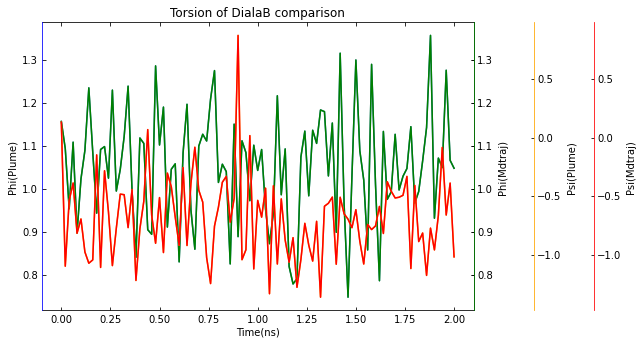

In [13]:
fig=plt.figure(1)
ax1=HostAxes(fig,[0,0,1,1])
ax2=ParasiteAxes(ax1,sharex=ax1)
ax3=ParasiteAxes(ax1,sharex=ax1)
ax4=ParasiteAxes(ax1,sharex=ax1)
ax1.parasites.append(ax2)
ax1.parasites.append(ax3)
ax1.parasites.append(ax4)
ax1.set_title('Torsion of DialaB comparison')
ax1.set_ylabel('Phi(Plume)')
ax1.set_xlabel("Time(ns)")
ax2.set_ylabel('Phi(Mdtraj)')
ax3.set_ylabel("Psi(Plume)")
ax4.set_ylabel("Psi(Mdtraj)")
ax2_axisline = ax2.get_grid_helper().new_fixed_axis
ax3_axisline = ax3.get_grid_helper().new_fixed_axis
ax4_axisline = ax4.get_grid_helper().new_fixed_axis
ax2.axis['right2'] = ax2_axisline(loc='right', axes=ax2)
ax3.axis['right3'] = ax3_axisline(loc='right', axes=ax3,offset=(60,0))
ax4.axis['right4'] = ax4_axisline(loc='right', axes=ax4,offset=(120,0))
fig.add_axes(ax1)
curve1,=ax1.plot(time,Bphi)
curve2,=ax2.plot(time,phiB,color='green')
curve3,=ax3.plot(time,Bpsi,color='orange')
curve4,=ax4.plot(time,psiB,color='red')
ax1.axis['left'].line.set_color('blue')
ax2.axis['right2'].line.set_color('green')
ax3.axis['right3'].line.set_color('orange')
ax4.axis['right4'].line.set_color('red')

<function matplotlib.pyplot.show(close=None, block=None)>

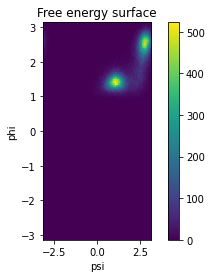

In [19]:
H,xedges,yedges=np.histogram2d(phi_A[1].flatten(),psi_A[1].flatten(),bins=100)
fig,ax=plt.subplots()
plt.imshow(H,extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]])
ax.set_title('Free energy surface')
ax.set_aspect(2)
plt.xlabel('psi')
plt.ylabel('phi')
plt.colorbar()
plt.show

In [22]:
def calSigma(l,f):
    sum=0
    for i in range(f):
        sum+=l[1][i]
    avg=sum/f
    sumOfDevi=0
    for i in range(f):
        sumOfDevi+=(l[1][i]-avg)**2
    sigma=(sumOfDevi/f)**0.5
    return sigma

In [25]:
sigmaAphi=calSigma(phi_A,100001)
sigmaApsi=calSigma(psi_A,100001)
sigmaBphi=calSigma(phi_B,100001)
sigmaBpsi=calSigma(psi_B,100001)

[0.55383155]
[1.02489812]
[0.13238176]
[0.34453442]
